media-desvio =  63.0
media+desvio =  83.0
[399 399]
[399 400]
[399 401]
[400 399]
[400 401]
[401 399]
[401 400]
[401 401]


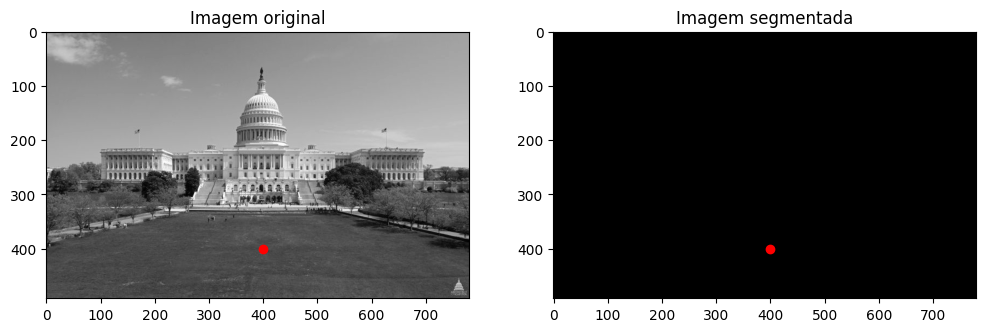

array([255, 255, 255, 255, 255, 255, 255, 255, 255], dtype=uint8)

In [188]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def segmentacao_crescimento(imagem, semente):
    # Define a cor da região segmentada
    cor = imagem[semente[0], semente[1]]
    # Define as coordenadas dos pixels vizinhos
    linhas, colunas = np.indices(imagem.shape)
    vizinhos = np.column_stack((linhas.flat, colunas.flat))

    # Define a matriz que indica quais pixels já foram incluídos na região
    incluidos = np.zeros_like(imagem, dtype=bool)
    # Inclui o pixel semente na região
    regiao = np.zeros_like(imagem, dtype=bool)
    regiao[semente[0], semente[1]] = True
    incluidos[semente[0], semente[1]] = True
    # Calcula a média e o desvio padrão da região inicial
    media = np.mean(imagem[regiao])
    desvio = np.std(imagem[regiao])+10
    print('media-desvio = ', media - desvio)
    print('media+desvio = ', media + desvio)
    # Inclui novos pixels na região enquanto houver pixels que se enquadram no critério definido
    while True:
        # Seleciona apenas os pixels vizinhos que ainda não foram incluídos na região
        selecionados = ~incluidos
        # Verifica se não há mais pixels disponíveis
        if not np.any(selecionados):
            break
        # Seleciona apenas os pixels vizinhos que se enquadram no critério definido
        for vizinho in vizinhos:
            # Verifica se o vizinho é um pixel válido e ainda não foi incluído na região
            # Verifica se o pixel vizinho está dentro de uma janela 3x3 centrada na semente
            if vizinho[0] >= semente[0] - 1 and vizinho[0] <= semente[0] + 1 and \
               vizinho[1] >= semente[1] - 1 and vizinho[1] <= semente[1] + 1 and \
               not incluidos[vizinho[0], vizinho[1]]:
                # Verifica se a intensidade do vizinho se enquadra no critério definido
                if imagem[vizinho[0], vizinho[1]] >= media - desvio and \
                   imagem[vizinho[0], vizinho[1]] <= media + desvio:
                    # Inclui o vizinho na região e marca como incluído
                    regiao[vizinho[0], vizinho[1]] = True
                    incluidos[vizinho[0], vizinho[1]] = True
                    print(vizinho)
                    # Atualiza a média e o desvio padrão da região
                    media = np.mean(imagem[regiao])
                    desvio = np.std(imagem[regiao])+10
        # Verifica se não há mais pixels que se enquadram no critério
        if not np.any(regiao & selecionados):
            break
    segmentada = np.zeros_like(imagem)
    segmentada[regiao] = 255
    # Retorna a imagem segmentada
    return segmentada

# Carrega a imagem em escala de cinza
imagem = Image.open("capitol.tiff").convert("L")
# Converte a imagem para um array numpy
imagem = np.array(imagem)
# Define o pixel semente
semente = (400, 400)
# Realiza a segmentação de crescimento a partir do pixel semente
segmentada = segmentacao_crescimento(imagem, semente)

# Plota as imagens original e segmentada
fig, axs = plt.subplots(1, 2, figsize=(12,6))
axs[0].imshow(imagem, cmap="gray")
axs[0].plot(semente[1], semente[0], 'ro')
axs[0].set_title("Imagem original")
axs[1].imshow(segmentada, cmap="gray")
axs[1].plot(semente[1], semente[0], 'ro')
axs[1].set_title("Imagem segmentada")
plt.show()
segmentada[segmentada > 0]